In [158]:
# Imporint Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [159]:
# Loading Dataset
df_date=pd.read_csv(r'E:\Revenue_Generation\dim_date.csv')
df_hotels=pd.read_csv(r'E:\Revenue_Generation\dim_hotels.csv')
df_rooms=pd.read_csv(r'E:\Revenue_Generation\dim_rooms.csv')
df_fact_aggregate = pd.read_csv(r'E:\Revenue_Generation\fact_aggregated_bookings.csv')
df = pd.read_csv(r'E:\Revenue_Generation\fact_bookings.csv')

In [160]:
# Showing the first five rows of the dataset
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920


In [161]:
# Showing the last five rows of the dataset
df.tail()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300
134589,Jul312217564RT410,17564,2022-07-31,2022-07-31,2022-08-01,2,RT4,makeyourtrip,NaN,Cancelled,32300,12920


In [162]:
df.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


In [163]:
# From the above description we can see that
# 1-> Maximum number of people stayed in the room is 6 and the minimum number of people statyed in the room is 1
# 2-> Maximum 5 rating is given and Minimum 1 rating is given


In [164]:
# Datatypes of the column of the data
df.dtypes

booking_id            object
property_id            int64
booking_date          object
check_in_date         object
checkout_date         object
no_guests              int64
room_category         object
booking_platform      object
ratings_given        float64
booking_status        object
revenue_generated      int64
revenue_realized       int64
dtype: object

In [165]:
# Checking the null values in the dataset
df.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77907
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

In [166]:
# Null values are present in the rating_given column
# Total number of null values in the rating_given column are 77907

Text(0.5, 1.0, 'Box plot of the rating column')

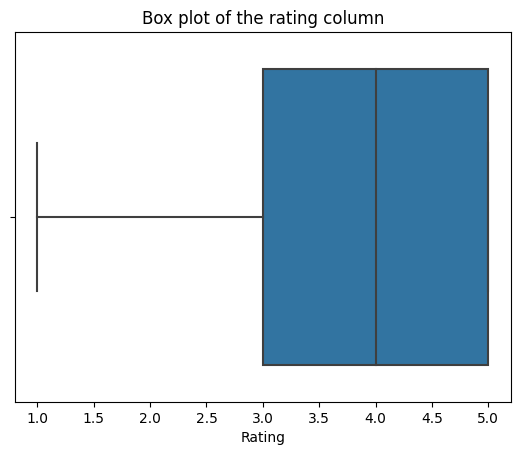

In [167]:
# Cheking if there are outliers in the rating column
sns.boxplot(x=df['ratings_given'])
plt.xlabel('Rating')
plt.title('Box plot of the rating column')

In [168]:
# From the above graph we can see that there is no outlier replacing null values with the help of the mean
df['ratings_given']=df['ratings_given'].fillna(value=df['ratings_given'].mean())

In [169]:
df['booking_data']=pd.to_datetime(df['booking_date'])
df['check_in_date']=pd.to_datetime(df['check_in_date'])

In [170]:
df['booking_date_month']=df['booking_data'].dt.month_name()

In [171]:
month_name=df['booking_date_month'].value_counts().index.to_list()
month_counts=df['booking_date_month'].value_counts().values

Text(0.5, 1.0, 'Hotel booked by the people in different months')

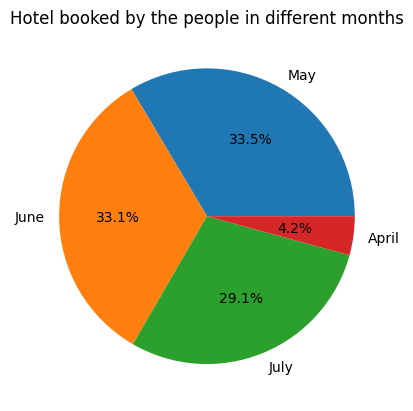

In [172]:
# Most of the people have book the hotel in the May months and there are very few people who book the hotel in the April months
# Pie chart is giving the graphical representation
fig,ax=plt.subplots()
ax.pie(month_counts,labels=month_name,autopct='%1.1f%%')
plt.title('Hotel booked by the people in different months')

In [173]:
df['check_in_date_month_name']=df['check_in_date'].dt.month_name()

In [174]:
month_name_checked_in=df['check_in_date_month_name'].value_counts().index.to_list()
month_counts_checked_in=df['check_in_date_month_name'].value_counts().values

Text(0.5, 1.0, 'Percentage of people who checked in the hotel in different months')

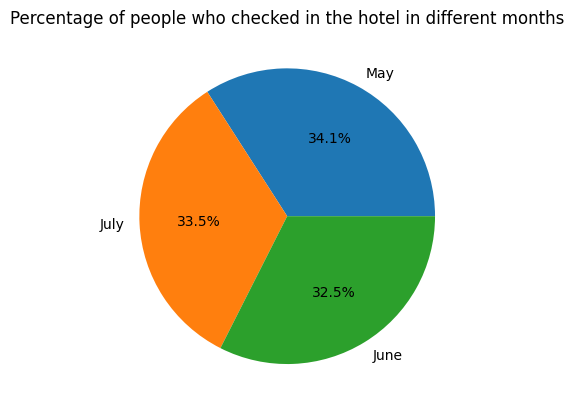

In [175]:
# Most of the people have checked in the month of May and there is no one who checked in the month of April
# Pie chart is giving the graphical representation
fig,ax=plt.subplots()
ax.pie(month_counts_checked_in,labels=month_name_checked_in,autopct='%1.1f%%')
plt.title('Percentage of people who checked in the hotel in different months')

In [176]:
df['checkout_date'] = pd.to_datetime(df['checkout_date'])

In [177]:
df['no_of_days_stays'] = (df['checkout_date']-df['check_in_date']).dt.days

In [178]:
df['no_of_days_stays'].unique()

array([1, 3, 2, 5, 6, 4], dtype=int64)

In [179]:
df['no_of_days_stays']=df['no_of_days_stays'].map({1:'One Day',2:'Two Day',3:'Three Day',4:'Four Day',5:'Five Day',6:'Six Day'})

In [180]:
# Maximum people stay for only one day for the hotel and there are very few people who stay for the four days in the hotel
days_name=df['no_of_days_stays'].value_counts().index.to_list()
days_name_counts=df['no_of_days_stays'].value_counts().values

In [181]:
days_name_counts

array([64066, 27144, 13083, 12738, 10842,  6717], dtype=int64)

Text(0.5, 1.0, 'Number of the day vs Number of the people lives in the hotel')

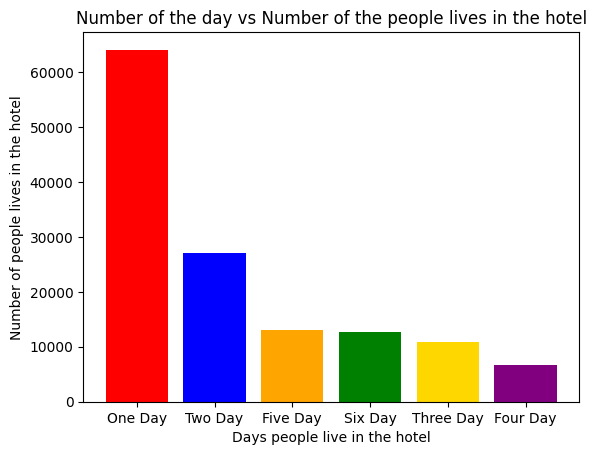

In [182]:
# Creating the bar graph
# Bar chart is giving the graphical representation
fig,ax=plt.subplots()
bar_labels = ['red', 'blue', 'orange', 'green','gold','purple']
bar_colors = ['red', 'blue', 'orange', 'green','gold','purple']
ax.bar(days_name,days_name_counts,label=bar_labels,color=bar_colors)
ax.set_xlabel('Days people live in the hotel')
ax.set_ylabel('Number of people lives in the hotel')
plt.title('Number of the day vs Number of the people lives in the hotel')

In [183]:
# Maximum people are have 2 people in one room and there are very few people who have 5 people in one room
df['no_guests']=df['no_guests'].map({1:'One Guests',2:'Two Guests',3:'Three Guests',4:'Four Guests',5:'Five Guests',6:'Six Guests'})

In [184]:
guest_per_room = df['no_guests'].value_counts().index.to_list()
guest_per_room_number= df['no_guests'].value_counts().values

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Two Guests'),
  Text(1, 0, 'One Guests'),
  Text(2, 0, 'Three Guests'),
  Text(3, 0, 'Four Guests'),
  Text(4, 0, 'Six Guests'),
  Text(5, 0, 'Five Guests')])

<Figure size 1000x1000 with 0 Axes>

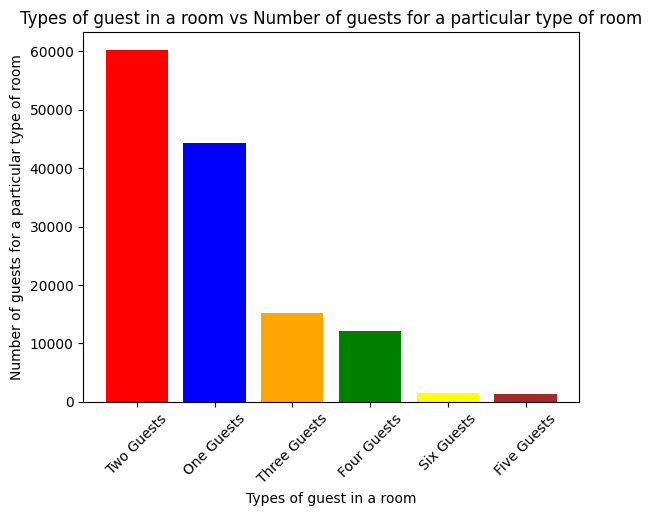

In [185]:
# Creating the bar graph
# Bar chart is giving the graphical representation
plt.figure(figsize=(10,10))
fig,ax=plt.subplots()
bar_labels = ['red', 'blue', 'orange', 'green','yellow','brown']
bar_colors = ['red', 'blue', 'orange', 'green','yellow','brown']
ax.bar(guest_per_room,guest_per_room_number,label=bar_labels,color=bar_colors)
ax.set_xlabel('Types of guest in a room')
ax.set_ylabel('Number of guests for a particular type of room')
plt.title('Types of guest in a room vs Number of guests for a particular type of room')
plt.xticks(rotation=45)

In [186]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [187]:
df['room_category']=df['room_category'].map({'RT1':'Standard','RT2':'Elite','RT3':'Premium','RT4':'Presidential'})

In [188]:
room_category_name=df['room_category'].value_counts().index.tolist()
room_category_count=df['room_category'].value_counts().values

Text(0.5, 1.0, 'Different categories of the room in hotel')

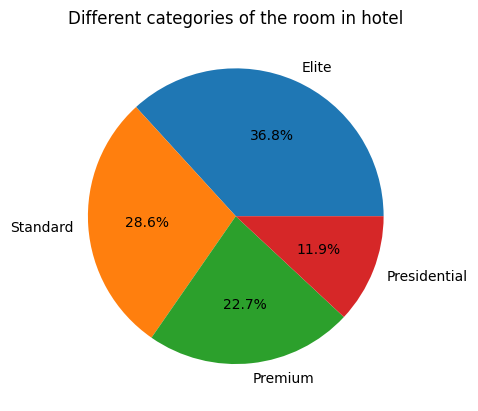

In [189]:
# Creating the pie graph
# Pie chart is giving the graphical representation
fig,ax=plt.subplots()
ax.pie(room_category_count,labels=room_category_name,autopct='%1.1f%%')
plt.title('Different categories of the room in hotel')

In [190]:
booking_status_type=df['booking_status'].value_counts().index.to_list()
booking_status_number=df['booking_status'].value_counts().values

Text(0.5, 1.0, 'Booking Status of the hotel')

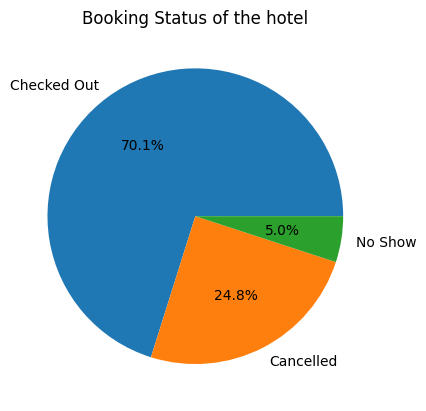

In [191]:
# Checked Out:- People booked the show and stays in the hotel
# Cancelled:- People who cancelled the hotel
# No Show:- People who book the hotel but do not stayed in the hotel
# Graphical Representation of the above data
fig,ax=plt.subplots()
ax.pie(booking_status_number,labels=booking_status_type,autopct='%1.1f%%')
plt.title('Booking Status of the hotel')

In [192]:
booking_platform_type=df['booking_platform'].value_counts().index.to_list()
booking_platform_number=df['booking_platform'].value_counts().values

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'others'),
  Text(1, 0, 'makeyourtrip'),
  Text(2, 0, 'logtrip'),
  Text(3, 0, 'direct online'),
  Text(4, 0, 'tripster'),
  Text(5, 0, 'journey'),
  Text(6, 0, 'direct offline')])

<Figure size 1000x1000 with 0 Axes>

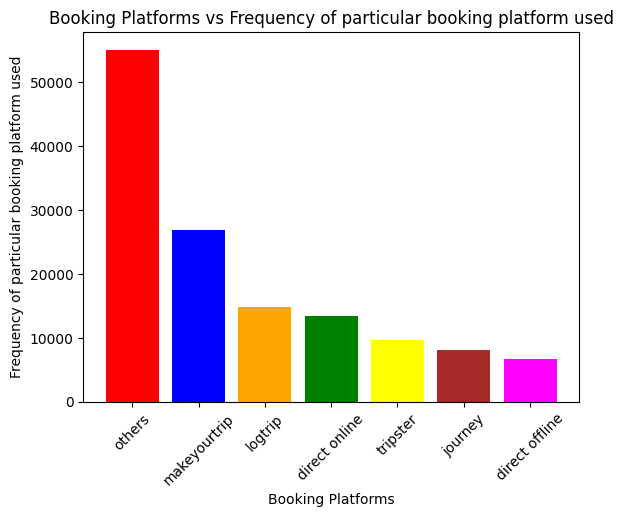

In [193]:
# Creating the bar graph
# Bar chart is giving the graphical representation
plt.figure(figsize=(10,10))
fig,ax=plt.subplots()
bar_labels = ['red', 'blue', 'orange', 'green','yellow','brown','Fuchsia']
bar_colors = ['red', 'blue', 'orange', 'green','yellow','brown','Fuchsia']
ax.bar(booking_platform_type,booking_platform_number,label=bar_labels,color=bar_colors)
ax.set_xlabel('Booking Platforms')
ax.set_ylabel('Frequency of particular booking platform used')
plt.title('Booking Platforms vs Frequency of particular booking platform used')
plt.xticks(rotation=45)

In [194]:
df.groupby(['no_guests','room_category']).size().unstack(fill_value=0)

room_category,Elite,Premium,Presidential,Standard
no_guests,,,,
Five Guests,0,933,458,0
Four Guests,4984,2148,1057,3907
One Guests,16948,8908,5515,12942
Six Guests,0,944,501,0
Three Guests,5439,3541,1718,4424
Two Guests,22134,14092,6824,17173


In [195]:
# From the above table we can see that Five guests(Living 5 people in one room) and Six guests(Living 6 people living in one) have taken only Premium and Presendential no elite and standard rooms were taken by these group
# From the above table we can see that One guests(Living 1 people in one room) have taken more Elite room

In [196]:
df.groupby(['booking_status','booking_date_month']).size().unstack(fill_value=0)

booking_date_month,April,July,June,May
booking_status,,,,
Cancelled,1486,9552,11194,11188
Checked Out,3935,27651,31220,31605
No Show,295,1964,2164,2336


In [197]:
# From the above table we can see that maximum people live in the hotel in the month of the May and the maximum people cancelled the hotel in the month of the June
# People who booked the hotel but no stay in the hotel are maximum in May and minimum in April

In [198]:
df.groupby(['room_category','booking_status']).size().unstack(fill_value=0)

booking_status,Cancelled,Checked Out,No Show
room_category,,,
Elite,12357,34653,2495
Premium,7605,21447,1514
Presidential,3928,11344,801
Standard,9530,26967,1949


In [199]:
# Insights from the above table
# Maximum number of rooms cancelled in the hotels have the room category Elite
# Maximum number of rooms that are checked out means people live in the hotel are also Elite
# Maximum number of rooms that people booked but do not live in the hotel are also Elite


In [200]:
df.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,booking_data,booking_date_month,check_in_date_month_name,no_of_days_stays
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,Three Guests,Standard,direct online,1.000000,Checked Out,10010,10010,2022-04-27,April,May,One Day
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,Two Guests,Standard,others,3.619004,Cancelled,9100,3640,2022-04-30,April,May,One Day
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,Two Guests,Standard,logtrip,5.000000,Checked Out,9100,9100,2022-04-28,April,May,Three Day
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,Two Guests,Standard,others,3.619004,Cancelled,9100,3640,2022-04-28,April,May,One Day
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,Four Guests,Standard,direct online,5.000000,Checked Out,10920,10920,2022-04-27,April,May,One Day


Text(0.5, 1.0, 'Booking Date Month vs Revenue Generated')

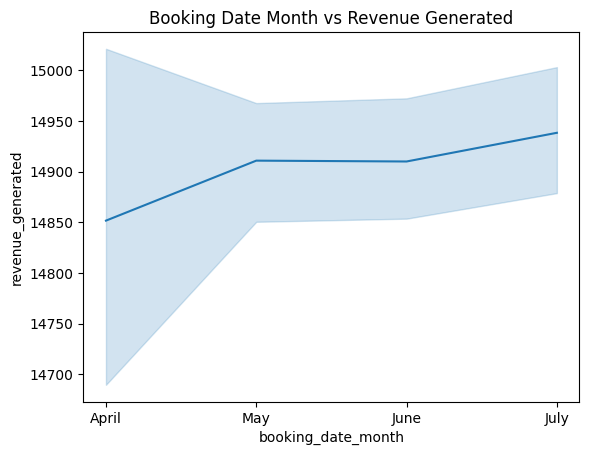

In [201]:
sns.lineplot(x=df['booking_date_month'],y=df['revenue_generated'])
plt.title('Booking Date Month vs Revenue Generated')

In [202]:
# From the above graph we can see that from April to May there is rise in the revenue generation and from May to June it is almost constant and from June to July it again rise little bit

Text(0.5, 1.0, 'Room Category vs Ratings')

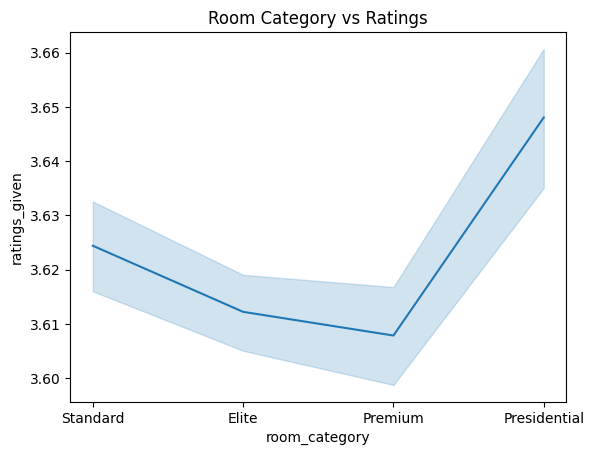

In [203]:
sns.lineplot(x=df['room_category'],y=df['ratings_given'])
plt.title('Room Category vs Ratings')

In [204]:
# Between Standard to Elite ratings are down in Elite and Premium also ratings are down but in Premium to Presidential ratings is increasing

In [206]:
# Saving the df pandas dataframe into new csv file
df.to_csv('df_clean.csv',index=False)